In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [4]:
data = pd.read_csv('C:/Users/rahil/OneDrive - The University of Texas at Dallas/Desktop/user_data.csv')

In [5]:
data.head

<bound method NDFrame.head of           user_id     stage  conversion
0          user_0  homepage        True
1          user_1  homepage        True
2          user_2  homepage        True
3          user_3  homepage        True
4          user_4  homepage        True
...           ...       ...         ...
17170  user_17170  purchase       False
17171  user_17171  purchase       False
17172  user_17172  purchase        True
17173  user_17173  purchase       False
17174  user_17174  purchase       False

[17175 rows x 3 columns]>

In [6]:
data["stage"].value_counts()

homepage        10000
product_page     5000
cart             1500
checkout          450
purchase          225
Name: stage, dtype: int64

In [8]:
funnel_stages = ['homepage', 'product_page', 'cart', 'checkout', 'purchase']

In [9]:
num_users = []
num_conversions = []

for stage in funnel_stages:
    stage_users = data[data['stage'] == stage]
    num_users.append(len(stage_users))
    num_conversions.append(stage_users['conversion'].sum())

In [14]:
fig = go.Figure(go.Funnel(
    y=funnel_stages,
    x=num_users,
    textposition='inside',
    textinfo='value',
    name='Users'
))

fig.add_trace(go.Funnel(
    y=funnel_stages,
    x=num_conversions,
    textposition='inside',
    textinfo='value',
    name='Conversions'
))

fig.update_layout(
    title='Funnel Analysis',
    funnelmode='stack'
)

In [15]:
import matplotlib.pyplot as plt


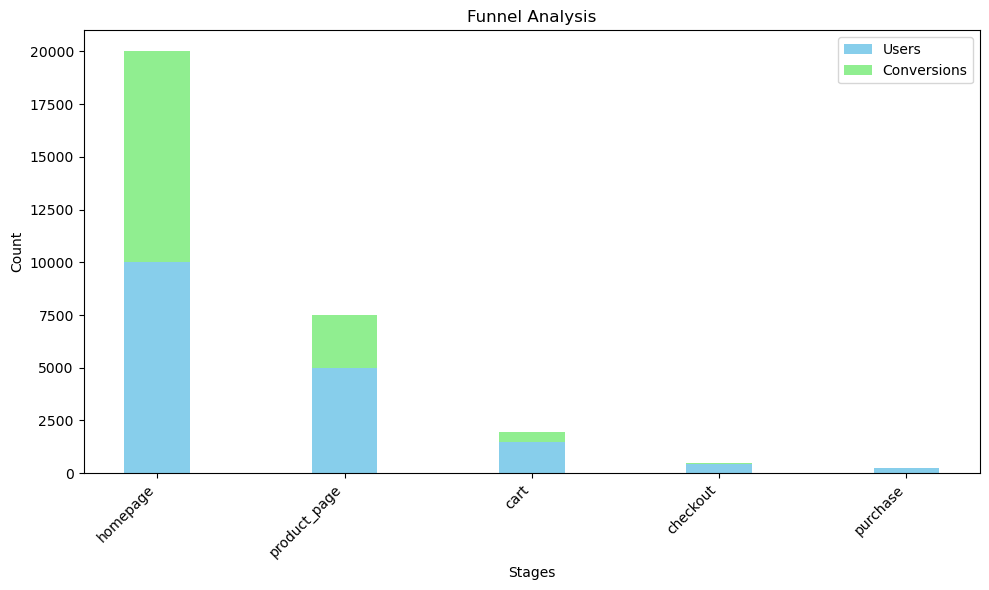

In [16]:
x = funnel_stages  # Stages for the x-axis
width = 0.35  # Width of each bar section

plt.figure(figsize=(10, 6))  # Set the figure size

# Create the bars for users
plt.bar(x, num_users, width, label='Users', color='skyblue')

# Stack the bars for conversions on top
plt.bar(x, num_conversions, width, label='Conversions', bottom=num_users, color='lightgreen')

plt.xlabel('Stages')
plt.ylabel('Count')
plt.title('Funnel Analysis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.legend()  # Add a legend
plt.tight_layout()  # Adjust spacing for better presentation

plt.show()